# PROVA 02 DE INTELIGÊNCIA ARTIFICIAL

***

### Aluna: Ana Clara Santos Dandrea - 20210025860


***

### -> Importação de bibliotecas e buscando base de dados

In [6347]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster, neighbors, svm, metrics, preprocessing 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from yellowbrick.classifier import ConfusionMatrix

# Import da base de dados
#D:/Downloads/akc-data.csv
base_akc = pd.read_csv("https://raw.githubusercontent.com/tmfilho/akcdata/master/data/akc-data-latest.csv")

# Definindo seed
SEED = 42 # get that reference!


In [6348]:
# Exibindo base de dados original
base_akc.rename(columns={'Unnamed: 0': 'Name'}, inplace=True)
# Exibindo base de dados original
pd.DataFrame(base_akc)

,Name,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,...,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,...,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,60.96,71.12,31.751466,58.967008,10.0,13.0,...,0.8,Daily Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,58.42,63.50,34.019428,38.555351,10.0,14.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.8,Friendly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,WVs are close relatives of Vizslas but a disti...,"Gentle, Loyal, Trainable",167,54.61,63.50,20.411657,29.483504,12.0,14.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
273,Working Kelpie,The overall appearance of the Working Kelpie i...,"Alert, Eager, Intelligent",NaN,48.26,63.50,12.700586,27.215542,12.0,15.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.6,Alert/Responsive
274,Xoloitzcuintli,The Xoloitzcuintli (show-low-eats-queen-tlee) ...,"Loyal, Alert, Calm",140,25.40,58.42,4.535924,24.947580,13.0,18.0,...,0.2,Occasional Bath/Brush,0.2,Infrequent,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
275,Yakutian Laika,For centuries the Yakutian Laika was an irrepl...,"Affectionate, Intelligent, Active",NaN,53.34,58.42,18.143695,24.947580,10.0,12.0,...,0.4,Weekly Brushing,0.6,Seasonal,0.8,Energetic,0.2,May be Stubborn,0.4,Reserved with Strangers


# 1 - Questão 01 

## 1.1 - Pré Processamento de Dados 

### Informaçoes do banco de dados

In [6349]:
print(f"Quantidade de linhas: {base_akc.shape[0]}")
print(f"Quantidade de colunas: {base_akc.shape[1]}")

Quantidade de linhas: 277
Quantidade de colunas: 21


### Limpeza de dados



#### -> Filtro inicial 


In [6350]:

# Os atributos abaixo foram removidos por serem redundantes e terem alta correlação com outras colunas de dados
base_akc = base_akc.drop('shedding_category', axis = 1)
base_akc = base_akc.drop('demeanor_category', axis = 1)
base_akc = base_akc.drop('grooming_frequency_category', axis = 1)
base_akc = base_akc.drop('energy_level_category', axis = 1)
base_akc = base_akc.drop('trainability_category', axis = 1)


# Os atributos Name e description foram removidos porque eram textuais e não tem relação/ influência no restante dos dados.
base_akc = base_akc.drop('Name', axis = 1)
base_akc = base_akc.drop('description', axis = 1)


Foi procurado por atributos que fossem redundantes ou únicos restar somente os atributos mais importantes.
A coluna "temperament" e a coluna "group" foram deixadas apesar de serem textuais pois foi julgado que elas poderão ajudar no diferenciamento dos grupos 

#### -> Verificando valores com 0


In [6351]:
# Verificação de valores 0s
valores_zero = base_akc == 0.0
valores_zero.sum()

temperament                 0
popularity                  0
min_height                  0
max_height                  0
min_weight                  1
max_weight                  1
min_expectancy              1
max_expectancy              1
group                       0
grooming_frequency_value    0
shedding_value              0
energy_level_value          0
trainability_value          0
demeanor_value              0
dtype: int64

In [6352]:
#ow_to_replace0 = valores_zero.iloc[0]
#row_to_replace1 = valores_zero.iloc[1]

# Substituindo os valores zero (0.0000) por NaN para poder preencher com a média posteriormente
#base_akc.loc[row_to_replace1.name, 'min_expectancy'] = float('NaN')
#base_akc.loc[row_to_replace1.name, 'max_expectancy'] = float('NaN')

# Substituindo os valores zero (0.0000) por NaN para poder preencher com a média posteriormente
#base_akc.loc[row_to_replace0.name, 'min_weight'] = float('NaN')
#base_akc.loc[row_to_replace0.name, 'max_weight'] = float('NaN')

# Colunas onde você deseja substituir os valores 0 por NaN
columns_to_replace_zeros = ['min_expectancy', 'max_expectancy', 'min_weight', 'max_weight']

# Substituindo os valores 0 por NaN em todas as colunas especificadas
for column in columns_to_replace_zeros:
    base_akc[column] = base_akc[column].replace(0, np.nan)

In [6353]:
# Verificação de valores 0s
valores_zero = base_akc == 0.0
valores_zero.sum()

temperament                 0
popularity                  0
min_height                  0
max_height                  0
min_weight                  0
max_weight                  0
min_expectancy              0
max_expectancy              0
group                       0
grooming_frequency_value    0
shedding_value              0
energy_level_value          0
trainability_value          0
demeanor_value              0
dtype: int64

Por ter apenas alguns atributos com 0s, considerando que o 0 não é um valor que normal para se ter como dados nesses atributos, trnasformei os valores 0s em valores nulos para trata-los todos juntos posteriormente.

#### -> Verificando valores nulos

In [6354]:
# Verificando se há valores vazios em cada coluna
missing_values = base_akc.isnull().sum()

# Exibindo as colunas com valores vazios
print("Colunas com valores vazios:")
print(missing_values)

Colunas com valores vazios:
temperament                  1
popularity                  79
min_height                   0
max_height                   0
min_weight                   3
max_weight                   3
min_expectancy               4
max_expectancy               4
group                        0
grooming_frequency_value     7
shedding_value              20
energy_level_value           6
trainability_value          24
demeanor_value              25
dtype: int64


In [6355]:
# O atributo popularity foi removido pela quantidade de dados nulos 
base_akc = base_akc.drop('popularity', axis = 1)

A coluna "Popularity" contém aproxiamdamente 29% de dados nulos, e para evitar impacto negativo nos resultados ela foi desconsiderada.



##### -> Coluna 'temperament'

In [6356]:
# Exibindo a linha em que 'temperament' é nulo
base_akc[base_akc['temperament'].isna()]

,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
236,NaN,57.15,67.31,22.679619,29.483504,12.0,15.0,Foundation Stock Service,0.2,0.4,0.8,0.4,1.0


Visto que a coluna contém apenas 1 valor nulo escolhi preencher manualmente utilizando o site "https://dogtime.com/dog-breeds/slovakian-wirehaired-pointer" o qual define o temperamento como "lively, happy, loyal and affectionate". A partir da descrição dada pelo site listei a frequencia de todas as palavras da coluna 'temperament' para buscar por sinonimos que condizem com as palavras dadas no site, evitando utilizar linguagem/maneira de descrição diferente da do banco de dados para a substituição do valor nulo.

In [6357]:
import pandas as pd


# Dividindo os valores da coluna "temperament" em palavras individuais e contando a frequência
temperament_counts = {}
for temperament in base_akc['temperament'].dropna():
    words = temperament.split(', ')
    for word in words:
        word = word.strip()  # Remove espaços em branco adicionais
        temperament_counts[word] = temperament_counts.get(word, 0) + 1

# Ordenando as palavras por frequência em ordem decrescente
temperament_counts_sorted = sorted(temperament_counts.items(), key=lambda x: x[1], reverse=True)

# Imprimindo as palavras da coluna "temperament" e suas frequências em ordem decrescente
print("Frequência das palavras na coluna 'temperament' (em ordem decrescente):")
for word, count in temperament_counts_sorted:
    print(f"'{word}': {count}")

Frequência das palavras na coluna 'temperament' (em ordem decrescente):
'Friendly': 50
'Intelligent': 49
'Loyal': 48
'Alert': 40
'Affectionate': 39
'Smart': 35
'Playful': 23
'Independent': 23
'Confident': 20
'Courageous': 20
'Gentle': 18
'Energetic': 14
'Lively': 14
'Calm': 14
'Devoted': 14
'Charming': 13
'Dignified': 12
'Bright': 12
'Active': 12
'Outgoing': 12
'Fearless': 10
'Happy': 9
'Curious': 8
'Good-Natured': 8
'Agile': 8
'Versatile': 8
'Spirited': 8
'Brave': 8
'Patient': 7
'Inquisitive': 7
'Bold': 7
'Even-Tempered': 7
'Noble': 7
'Sociable': 6
'Determined': 6
'Faithful': 6
'Watchful': 6
'Sensitive': 6
'Proud': 6
'Clever': 5
'Self-Confident': 5
'Trainable': 5
'Fun-Loving': 5
'Enthusiastic': 5
'Loving': 5
'Family-Oriented': 5
'Sweet': 4
'Eager': 4
'Reserved': 4
'Cheerful': 4
'Merry': 4
'Obedient': 4
'Hardworking': 4
'Amusing': 4
'Adaptable': 4
'Mischievous': 4
'Graceful': 4
'Attentive': 4
'Mellow': 3
'Easy-Going': 3
'Comical': 3
'Reserved with Strangers': 3
'Powerful': 3
'Strong-Wi

O atributo 'temperament' foi definido como "Affectionate, Loyal, Happy".

In [6358]:
base_akc['temperament'] = base_akc['temperament'].fillna('Affectionate, Loyal, Happy')

##### -> Preenchendo valores nulos > 5% dos valores totais

 Para colunas numéricas que contém valores nulos maior que 5% (13,8) da quantidade de dados total foi definido que os valores nulos seriam preenchidos com a média da dos dados totais do atributo.  

In [6359]:
# Calcular as médias
shedding_mean = base_akc['shedding_value'].mean()
trainability_mean = base_akc['trainability_value'].mean()
demeanor_mean = base_akc['demeanor_value'].mean()

# Preencher os valores nulos com as médias calculadas em todo o DataFrame
base_akc.fillna({'shedding_value': shedding_mean, 'trainability_value': trainability_mean, 'demeanor_value': demeanor_mean}, inplace=True)

- Verificando valores nulos restantes

In [6360]:
# Verificando se há valores vazios em cada coluna
missing_values = base_akc.isnull().sum()

# Exibindo as colunas com valores vazios
print("Colunas com valores vazios:")
print(missing_values)

Colunas com valores vazios:
temperament                 0
min_height                  0
max_height                  0
min_weight                  3
max_weight                  3
min_expectancy              4
max_expectancy              4
group                       0
grooming_frequency_value    7
shedding_value              0
energy_level_value          6
trainability_value          0
demeanor_value              0
dtype: int64


#### -> Colunas 'min_weight' e 'max_weight'

In [6361]:
# Exibindo as linhas em que ambos os valores de 'min_weight' e 'max_weight' são nulos
base_akc[base_akc[['min_weight','max_weight']].isnull().all(axis= 1)]

,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
16,"Loyal, Alert, Intelligent",43.18,50.80,NaN,NaN,10.0,13.0,Foundation Stock Service,0.4,0.800000,0.8,1.0,0.6
65,"Affectionate, Intelligent, Majestic",59.69,69.85,NaN,NaN,9.0,12.0,Working Group,0.2,0.400000,0.8,0.6,0.6
244,"Sociable, Patient, Docile",55.88,68.58,NaN,NaN,10.0,12.0,Sporting Group,0.4,0.529183,0.8,0.6,0.6


- Verificando correlações:


In [6362]:
# Limitando busca apenas para valores numéricos
colunas = base_akc.select_dtypes(include=['float64', 'int64']) 

# max_weight
correlations_max = colunas.drop(columns="max_weight").corrwith(base_akc["max_weight"]).abs().sort_values(ascending=False)
print("\nCorrelação: 'max_weight':")
print(correlations_max)

#  min_weight
correlations_min = colunas.drop(columns="min_weight").corrwith(base_akc["min_weight"]).abs().sort_values(ascending=False)
print("\nCorrelação: 'min_weight':")
print(correlations_min)




Correlação: 'max_weight':
min_weight                  0.947116
max_height                  0.816879
min_height                  0.802855
max_expectancy              0.604172
min_expectancy              0.584678
shedding_value              0.274627
demeanor_value              0.249942
grooming_frequency_value    0.123211
energy_level_value          0.074074
trainability_value          0.069349
dtype: float64

Correlação: 'min_weight':
max_weight                  0.947116
min_height                  0.826045
max_height                  0.803600
max_expectancy              0.642030
min_expectancy              0.620639
shedding_value              0.278018
demeanor_value              0.255506
grooming_frequency_value    0.145948
trainability_value          0.122592
energy_level_value          0.069667
dtype: float64


Foi verificado alta correlação entre 'min_weight'/'max_weight' com os atributos 'min_height'/max_height'. Sabendo dessa alta correlação para cada linha com dado min/max weight nulo procurei a linha com maior proximidade de max_height e min_height e substitui os valores de max_wieght e min_weight delas na coluna dos valores nulos.

In [6363]:
#coll_null = base_akc[base_akc['min_weight'].isnull() & base_akc['max_weight'].isnull()]

In [6364]:

# Criar um DataFrame apenas com linhas onde 'min_weight' e 'max_weight' são nulos
coll_null = base_akc[base_akc['min_weight'].isnull() & base_akc['max_weight'].isnull()]

# Iterar sobre cada linha com valores nulos
for index, row in coll_null.iterrows():
    # Encontrar o índice da linha mais próxima com valores não nulos para 'min_height' e 'max_height'
    closest_row_index = base_akc[~base_akc['min_weight'].isnull() & ~base_akc['max_weight'].isnull()] \
        .apply(lambda x: np.linalg.norm([row['min_height'] - x['min_height'], row['max_height'] - x['max_height']]), axis=1) \
        .idxmin()
    
    # Preencher os valores nulos de 'min_weight' e 'max_weight' com os valores da linha mais próxima
    base_akc.at[index, 'min_weight'] = base_akc.at[closest_row_index, 'min_weight']
    base_akc.at[index, 'max_weight'] = base_akc.at[closest_row_index, 'max_weight']


In [6365]:
#knn = neighbors.KNeighborsClassifier(n_neighbors= 3, algorithm= 'auto')
#knn.fit(trainSample, trainTarget)
#resultKNN = knn.predict(testSample)

In [6366]:
# Índices das linhas que tem o max e min weight nulos
indices_das_linhas = [16, 65, 244]

# Imprimindo as linhas específicas em formato de tabela
print(base_akc.loc[indices_das_linhas].to_string(index=False))


                        temperament  min_height  max_height  min_weight  max_weight  min_expectancy  max_expectancy                    group  grooming_frequency_value  shedding_value  energy_level_value  trainability_value  demeanor_value
          Loyal, Alert, Intelligent       43.18       50.80   15.875733   22.679619            10.0            13.0 Foundation Stock Service                       0.4        0.800000                 0.8                 1.0             0.6
Affectionate, Intelligent, Majestic       59.69       69.85   31.751466   49.895161             9.0            12.0            Working Group                       0.2        0.400000                 0.8                 0.6             0.6
          Sociable, Patient, Docile       55.88       68.58   68.038855   90.718474            10.0            12.0           Sporting Group                       0.4        0.529183                 0.8                 0.6             0.6


In [6367]:
print(f"Quantidade de linhas: {base_akc.shape[0]}")
print(f"Quantidade de colunas: {base_akc.shape[1]}")

Quantidade de linhas: 277
Quantidade de colunas: 13


#### -> Colunas 'min_expectancy' e 'max_expectancy'

In [6368]:
# Exibindo as linhas em que ambos os valores de 'min_expectancy' e 'max_expectancy' são nulos
base_akc[base_akc[['min_expectancy','max_expectancy']].isnull().all(axis= 1)]

,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
55,"Friendly, Smart, Willing to Please",46.990,58.42,18.143695,24.947580,NaN,NaN,Foundation Stock Service,0.2,0.6,1.0,0.624506,0.620635
67,"Loyal, Independent, Reserved with Strangers",45.085,49.53,13.607771,24.947580,NaN,NaN,Foundation Stock Service,0.2,0.6,0.6,1.000000,0.600000
71,"Independent, Courageous, Self-Confident",64.770,69.85,39.916129,49.895161,NaN,NaN,Foundation Stock Service,0.2,0.6,0.4,0.400000,0.200000
209,"Affectionate, Active, Enthusiastic",38.100,53.34,6.803886,13.607771,NaN,NaN,Herding Group,0.4,0.6,0.8,0.600000,0.400000


- Verificando correlações com outras colunas:

In [6369]:
# Limitando busca apenas para valores numéricos
colunas = base_akc.select_dtypes(include=['float64', 'int64']) 

# max_expectancy
correlations_max = colunas.drop(columns="max_expectancy").corrwith(base_akc["max_expectancy"]).abs().sort_values(ascending=False)
print("\nCorrelação: 'max_expectancy':")
print(correlations_max)

#  min_expectancy
correlations_min = colunas.drop(columns="min_expectancy").corrwith(base_akc["min_expectancy"]).abs().sort_values(ascending=False)
print("\nCorrelação: 'min_expectancy':")
print(correlations_min)




Correlação: 'max_expectancy':
min_expectancy              0.722570
min_weight                  0.637813
max_weight                  0.604389
min_height                  0.521806
max_height                  0.512377
shedding_value              0.371127
demeanor_value              0.146936
grooming_frequency_value    0.136458
trainability_value          0.096873
energy_level_value          0.028560
dtype: float64

Correlação: 'min_expectancy':
max_expectancy              0.722570
min_weight                  0.614189
max_weight                  0.583044
min_height                  0.507903
max_height                  0.475330
shedding_value              0.254702
demeanor_value              0.161169
trainability_value          0.093219
grooming_frequency_value    0.027656
energy_level_value          0.012808
dtype: float64


In [6370]:

print(f"Informações coluna {'min_expectancy'}: \n\tMédia: {base_akc['min_expectancy'].mean()} \n\tMediana: {base_akc['min_expectancy'].median()} \n\tModa: {base_akc['min_expectancy'].mode()[0]} \n\tDesvio Padrão: {base_akc['min_expectancy'].std()}\n")

print(f"Informações coluna {'max_expectancy'}: \n\tMédia: {base_akc['max_expectancy'].mean()} \n\tMediana: {base_akc['max_expectancy'].median()} \n\tModa: {base_akc['max_expectancy'].mode()[0]} \n\tDesvio Padrão: {base_akc['max_expectancy'].std()}\n")

Informações coluna min_expectancy: 
	Média: 11.347985347985349 
	Mediana: 12.0 
	Moda: 12.0 
	Desvio Padrão: 1.6868232760103863

Informações coluna max_expectancy: 
	Média: 13.882783882783883 
	Mediana: 14.0 
	Moda: 15.0 
	Desvio Padrão: 1.8373665260137269



Os atributos 'min_expectancy' e 'max_expectancy' não tem uma correlação tão forte com outros atributos, dessa forma calculei a media moda e mediana dos dois atributos para decidir como seguir. O resultados dos dados não mostram grande desvio padrão entre os dados, sugerindo que a veriação deles não é tão grande. Sendo assim optei por preencher os valores nulos com a média dos dados.



In [6371]:
base_akc['min_expectancy'] = base_akc['min_expectancy'].fillna(base_akc['min_expectancy'].median())
base_akc['max_expectancy'] = base_akc['max_expectancy'].fillna(base_akc['max_expectancy'].median())

#### -> Coluna 'grooming_frequency_value'

- Verificando correlação:


In [6372]:
# Limitando busca apenas para valores numéricos
colunas = base_akc.select_dtypes(include=['float64', 'int64']) 

# grooming_frequency_value
correlations = colunas.drop(columns="grooming_frequency_value").corrwith(base_akc["grooming_frequency_value"]).abs().sort_values(ascending=False)
print("\nCorrelação: 'grooming_frequency_value':")
print(correlations)



Correlação: 'grooming_frequency_value':
max_height            0.244199
min_height            0.186637
energy_level_value    0.151441
min_weight            0.147378
max_expectancy        0.134571
max_weight            0.126555
demeanor_value        0.109984
trainability_value    0.096439
shedding_value        0.068787
min_expectancy        0.022403
dtype: float64


In [6373]:
print(f"Informações coluna {'grooming_frequency_value'}: \n\tMédia: {base_akc['grooming_frequency_value'].mean()} \n\tMediana: {base_akc['grooming_frequency_value'].median()} \n\tModa: {base_akc['grooming_frequency_value'].mode()[0]} \n\tDesvio Padrão: {base_akc['grooming_frequency_value'].std()}\n")


Informações coluna grooming_frequency_value: 
	Média: 0.42592592592592593 
	Mediana: 0.4 
	Moda: 0.4 
	Desvio Padrão: 0.19830619670722646



- Pela baixa correlação com todas os atributos verifiquei a media, moda, mediana e std da coluna. Após tirar essas estatisticas optei por escolher a moda para substituir os valores nulos(NaN) já que os dados de 'grooming_frequency_value' variam apenas de 0 - 1 e que os resultados não mostram grande disperção. 


In [6374]:
base_akc['grooming_frequency_value'] = base_akc['grooming_frequency_value'].fillna(base_akc['grooming_frequency_value'].median())

#### -> Coluna 'energy_level_value'

- Verificando correlações:

In [6375]:
# Limitando busca apenas para valores numéricos
colunas = base_akc.select_dtypes(include=['float64', 'int64']) 

# energy_level_value
correlations = colunas.drop(columns="energy_level_value").corrwith(base_akc["energy_level_value"]).abs().sort_values(ascending=False)
print("\nCorrelação: 'energy_level_value':")
print(correlations)


Correlação: 'energy_level_value':
max_height                  0.198560
min_height                  0.174194
shedding_value              0.167375
grooming_frequency_value    0.149574
trainability_value          0.110503
max_weight                  0.064367
min_weight                  0.058074
max_expectancy              0.028107
min_expectancy              0.012189
demeanor_value              0.002875
dtype: float64


In [6376]:
print(f"Informações coluna {'energy_level_value'}: \n\tMédia: {base_akc['energy_level_value'].mean()} \n\tMediana: {base_akc['energy_level_value'].median()} \n\tModa: {base_akc['grooming_frequency_value'].mode()[0]} \n\tDesvio Padrão: {base_akc['energy_level_value'].std()}\n")


Informações coluna energy_level_value: 
	Média: 0.7129151291512915 
	Mediana: 0.6 
	Moda: 0.4 
	Desvio Padrão: 0.16892686394666076



- Pela baixa correlação com todas os atributos verifiquei a media, moda, mediana e std da coluna. Após tirar essas estatisticas optei por escolher a média para substituir os valores nulos(NaN).

In [6377]:
base_akc['energy_level_value'] = base_akc['energy_level_value'].fillna(base_akc['energy_level_value'].mode()[0])

#### -> Filtragem Completa

In [6378]:
# Verificação de valores nulos 
base_akc.isnull().sum()

temperament                 0
min_height                  0
max_height                  0
min_weight                  0
max_weight                  0
min_expectancy              0
max_expectancy              0
group                       0
grooming_frequency_value    0
shedding_value              0
energy_level_value          0
trainability_value          0
demeanor_value              0
dtype: int64

### Redução de Dimensionalidade Manual


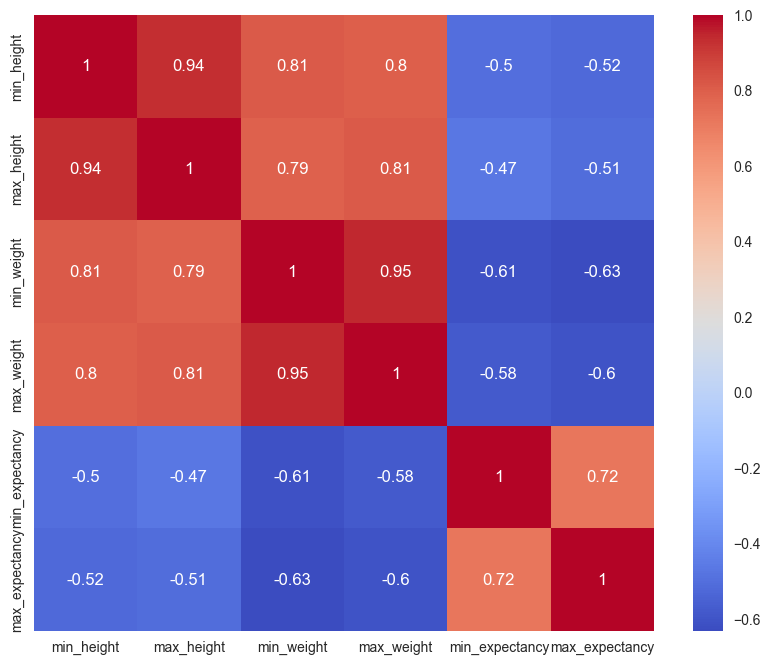

In [6379]:
# Atributos com maior taxa de correlação
correlation_matrix = (base_akc.iloc[:, 1:7]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#### -> Colunas 'min_weight', 'max_weight', 'min_height', 'max_heigt'

Será feita a redução da dimensionalidade das colunas ("min_weight" e "max_weight") e ("min_height" e "max_heigt") devido a alta correlação entre os dois atributos (foi mostrado anteriormente na parte "Limpeza de Dados" e no gráfico acima). Sendo assim será criado um novo atributo - average_weight e average_height - composto pela média do minimo e maximo de cada linha.

In [6380]:

# Criar uma cópia do DataFrame para armazenar os resultados da agregação
base_akc_aggregated = base_akc.copy()

# Realizar a agregação das colunas min_height e max_height pela média
base_akc_aggregated['average_height'] = (base_akc['min_height'] + base_akc['max_height']) / 2

# Realizar a agregação das colunas min_weight e max_weight pela média
base_akc_aggregated['average_weight'] = (base_akc['min_weight'] + base_akc['max_weight']) / 2

# Drop das colunas originais min_height, max_height, min_weight e max_weight
base_akc_aggregated.drop(['min_height', 'max_height', 'min_weight', 'max_weight'], axis=1, inplace=True)

In [6381]:
pd.DataFrame(base_akc_aggregated)
base_akc_aggregated.head(3)

,temperament,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,average_height,average_weight
0,"Confident, Famously Funny, Fearless",12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0,26.035,3.855535
1,"Dignified, Profoundly Loyal, Aristocratic",12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2,66.040,24.947580
2,"Friendly, Clever, Courageous",11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8,58.420,27.215542


#### -> Coluna 'temperament'

Como este atributo consiste em texto e contém múltiplas palavras, optei por excluir esta coluna. Além de demandar recursos computacionais significativos, não encontrei uma maneira imparcial e objetiva de dividir todas as palavras em grupos menores.


In [6382]:
base_akc_aggregated.drop(columns=['temperament'], inplace= True)


#### -> Matriz de Correlação após redução de dimensionamento manual

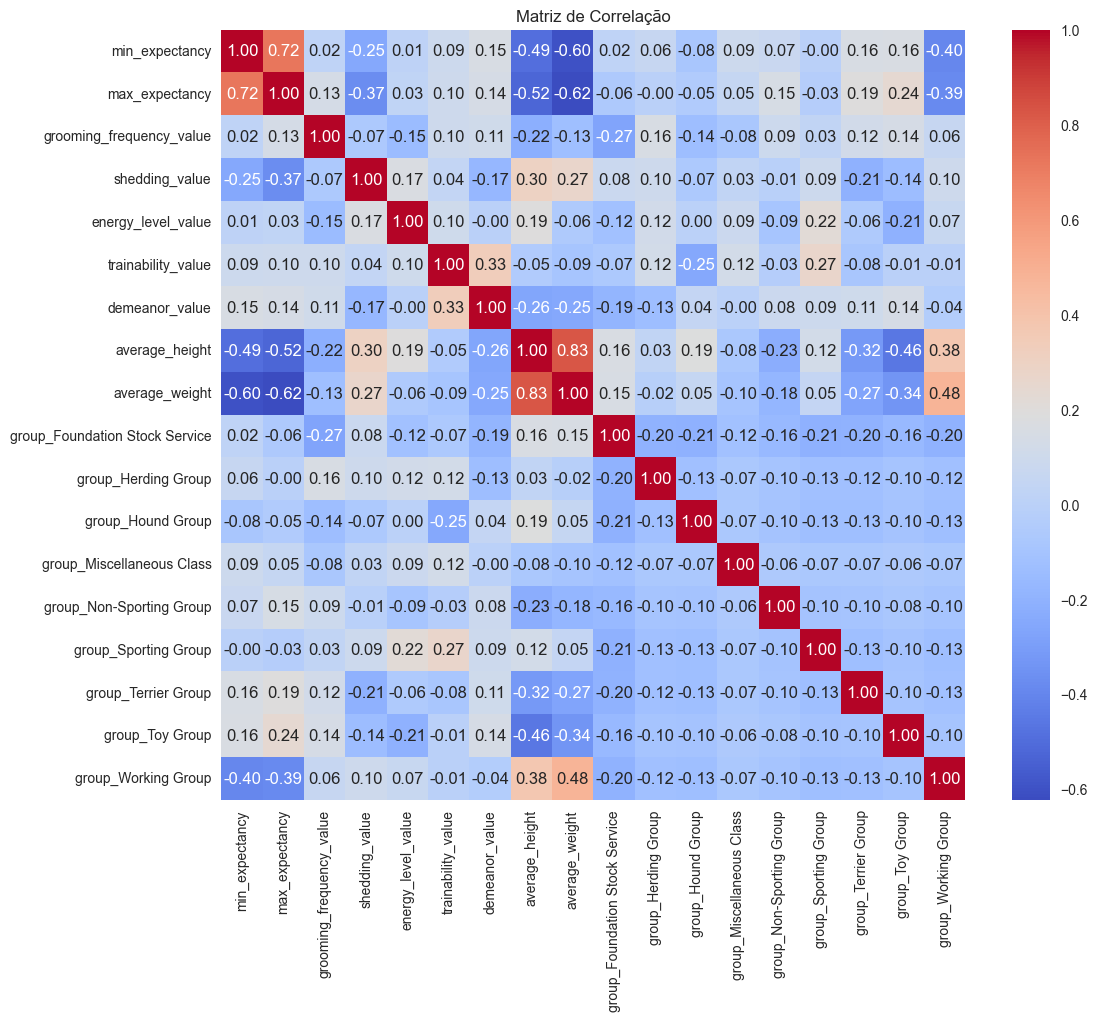

In [6383]:
# Codificação de variáveis dummy
encoded_data = pd.get_dummies(base_akc_aggregated)

# Calculando a matriz de correlação
correlation_matrix = encoded_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


### Redução de Dimensionalidade (PCA)

- Após a limpeza de dados nulos ou 0s e da redução manual restaram esses atributos:



In [6384]:
for column in base_akc_aggregated.columns:
    print(column)

min_expectancy
max_expectancy
group
grooming_frequency_value
shedding_value
energy_level_value
trainability_value
demeanor_value
average_height
average_weight


In [6385]:
# Cópia dos atributos antes da agregação para usar no PCA
pca_base_ack = base_akc.copy()

pca_base_ack.drop(columns=['temperament'], inplace= True) 

# Normalizando os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(pca_base_ack.drop('group', axis= 1))

# Especificando o número de componetes
n_components = 7  # Numero foi escolhido pois o gráfico de variancia acumulada (mostrado abaixo) começou e estabilizar após ele


# Inicializando e ajustando o modelo PCA aos dados normalizados
pca = PCA(n_components = n_components)
pca.fit(features_scaled)

# Transformando os dados para o espaço de componentes principais
features_pca = pca.transform(features_scaled)

print("Dimensões dos dados após o PCA:", features_pca.shape)

Dimensões dos dados após o PCA: (277, 7)


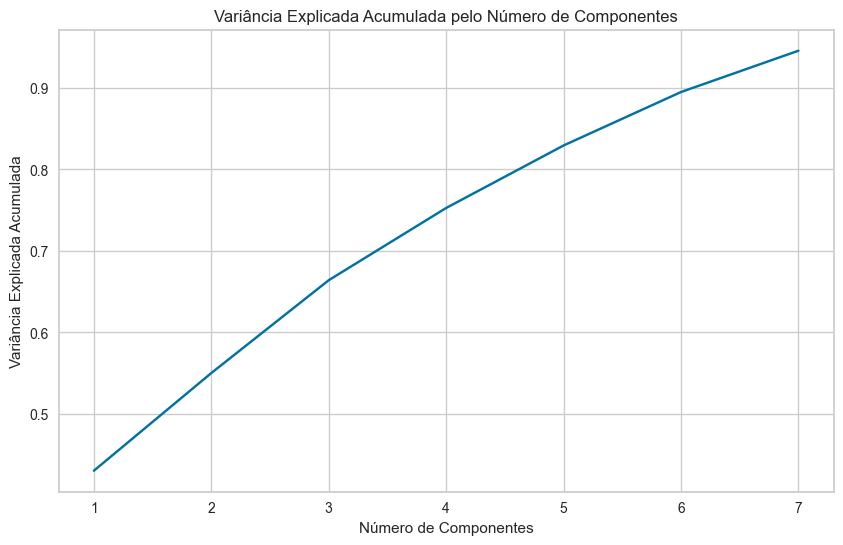

In [6386]:

# Plotar o gráfico da variância explicada acumulada em relação ao número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada pelo Número de Componentes')
plt.grid(True)
plt.show()

In [6387]:
pd.DataFrame(pca_base_ack)

,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
0,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0
1,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2
2,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8
3,60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,0.6,0.8,1.0,0.6
4,58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,0.6,0.8,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
272,54.61,63.50,20.411657,29.483504,12.0,14.0,Sporting Group,0.2,0.6,0.8,0.6,0.6
273,48.26,63.50,12.700586,27.215542,12.0,15.0,Foundation Stock Service,0.2,0.6,0.8,0.4,0.6
274,25.40,58.42,4.535924,24.947580,13.0,18.0,Non-Sporting Group,0.2,0.2,0.8,0.6,0.6
275,53.34,58.42,18.143695,24.947580,10.0,12.0,Foundation Stock Service,0.4,0.6,0.8,0.2,0.4


## 1.2 - Random Forest, Naive Bays e MLP

#### -> Divisão de conjuntos de treinamento e teste


In [6388]:
# Atributos
features = base_akc_aggregated.drop('group', axis= 1).values

# Rótulos
target = base_akc_aggregated['group']


In [6389]:

# Dividi os dados em conjuntos de treinamento e teste usando a base com agregação manual
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.4, random_state = SEED, stratify = target )

# Dividi os dados em conjuntos de treinamento e teste usando a base com PCA
features_train_pca, features_test_pca, target_train_pca, target_test_pca = train_test_split(features_pca, target, test_size = 0.4, random_state = SEED, stratify = target)

### Random Forest


In [6390]:
# Import do modelo de Árvore de Decisão que será utilizado
from sklearn.ensemble import RandomForestClassifier

In [6391]:
# Inicializa o classificador Random Forest para base com agregação manual
random_forest = RandomForestClassifier(n_estimators=100, random_state=SEED)

# Inicializa o classificador Random Forest para base com PCA
random_forest_pca = RandomForestClassifier(n_estimators=100, random_state=SEED)

# Treina os classificadores
random_forest.fit(features_train, target_train)  # Manual
random_forest_pca.fit(features_train_pca, target_train_pca)  #PCA

# Faz previsões no conjunto de teste
target_pred = random_forest.predict(features_test)
target_pred_pca = random_forest_pca.predict(features_test_pca)


In [6392]:
from sklearn.metrics import accuracy_score

print('---Acurácias---\n')

# Calcula a acurácia para o classificador Random Forest sem PCA
accuracy = accuracy_score(target_test, target_pred)
print("Acurácia do Random Forest sem PCA:", accuracy)

# Calcula a acurácia para o classificador Random Forest com PCA
accuracy_pca = accuracy_score(target_test_pca, target_pred_pca)
print("Acurácia do Random Forest com PCA:", accuracy_pca)

---Acurácias---

Acurácia do Random Forest sem PCA: 0.4774774774774775
Acurácia do Random Forest com PCA: 0.42342342342342343


#### -> Randon forest - Redução Manual 

In [6393]:
from sklearn.metrics import f1_score

# Avaliação da precisão do modelo treinado com a base de agregação manual utilizando F1-score
# Trata todas as classes igualmente.
f1_macro = f1_score(target_test, target_pred, average='macro') * 100
print("F1-score (Macro Average): {:.2f}%".format(f1_macro))

## Dá mais importância às classes com mais exemplos.
f1_weighted = f1_score(target_test, target_pred, average='weighted') * 100
print("F1-score (Weighted Average): {:.2f}%".format(f1_weighted))



F1-score (Macro Average): 39.88%
F1-score (Weighted Average): 45.33%


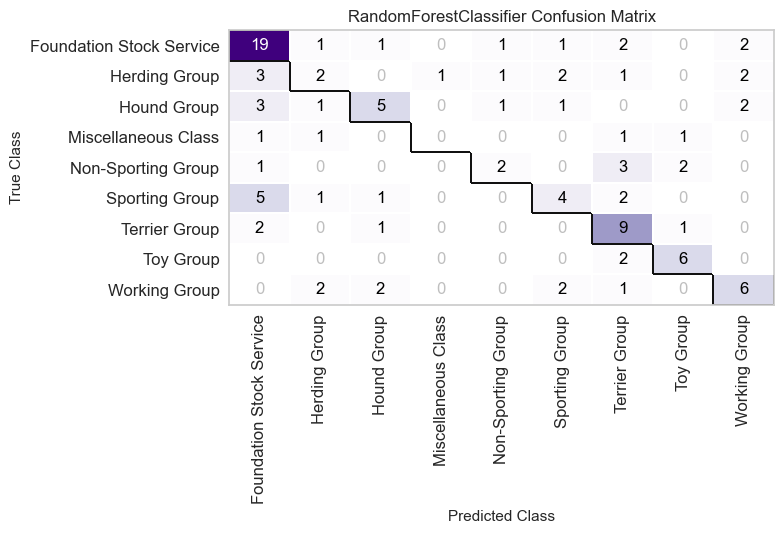

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [6394]:
from yellowbrick.classifier import ConfusionMatrix

# Criar o visualizador da matriz de confusão
cm = ConfusionMatrix(random_forest, cmap='Purples')

# Ajustar os dados de treinamento ao visualizador
cm.fit(features_train, target_train)

# Avaliar o modelo nos dados de teste
cm.score(features_test, target_test)
cm.show()


#### -> Random forest - PCA

In [6395]:
# Trata todas as classes igualmente.
f1_macro = f1_score(target_test_pca, target_pred_pca, average='macro') * 100
print("F1-score (Macro Average): {:.2f}%".format(f1_macro))

## Dá mais importância às classes com mais exemplos.
f1_weighted = f1_score(target_test_pca, target_pred_pca, average='weighted') * 100
print("F1-score (Weighted Average): {:.2f}%".format(f1_weighted))


F1-score (Macro Average): 34.46%
F1-score (Weighted Average): 40.27%


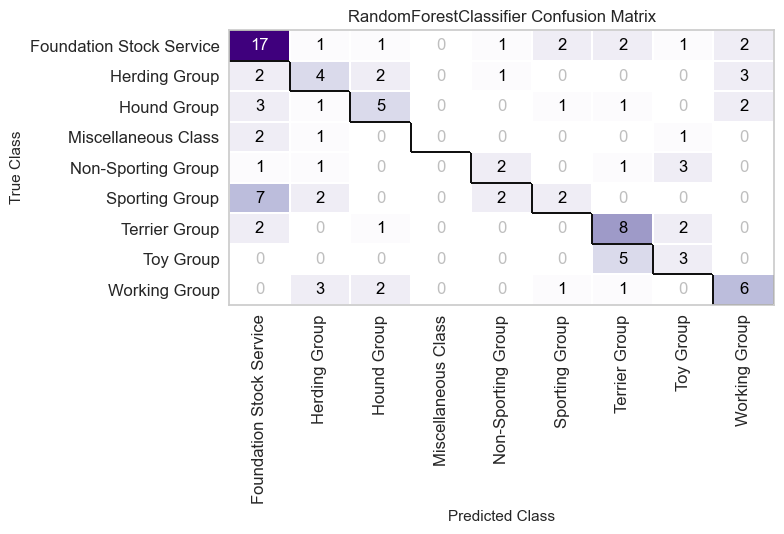

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [6396]:
from yellowbrick.classifier import ConfusionMatrix

# Criar o visualizador da matriz de confusão
cm = ConfusionMatrix(random_forest_pca, cmap='Purples')

# Ajustar os dados de treinamento ao visualizador
cm.fit(features_train_pca, target_train_pca)

# Avaliar o modelo nos dados de teste
cm.score(features_test_pca, target_test_pca)
cm.show()


#### -> Conclusão

- O Random Forest com redução manual apresenta melhor desempenho em acurácia e F1-score em comparação com o modelo com PCA. Isso sugere que a base de dados manualmente agrupada proporcionou um treinamento mais eficaz. A matriz de confusão revela desafios na distribuição das previsões entre as classes, reflexo do desbalanceamento e da amostragem estratificada. O tamanho pequeno e o desbalanceamento do conjunto de dados original impactaram negativamente o desempenho do modelo, sendo comum em conjuntos pequenos e desbalanceados enfrentar dificuldades de modelagem e viés em direção às classes majoritárias.


### Naive Bays


In [6397]:
# Import Naive Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB# Inicializando o modelo

gnb = GaussianNB()
gnb_pca = GaussianNB()

# Treinando os modelos no conjunto de treinamento
gnb.fit(features_train, target_train)
gnb_pca.fit(features_train_pca, target_train_pca)
   
# Fazendo previsões no conjunto de teste
target_pred = gnb.predict(features_test)
target_pred_pca = gnb_pca.predict(features_test_pca)

In [6398]:
print('---Acurácias---\n')

# Calcular a acurácia dos modelos Naive Bayes Gaussiano
accuracy_gnb = accuracy_score(target_test, target_pred)
accuracy_gnb_pca = accuracy_score(target_test_pca, target_pred_pca)

print("Acurácia do Naive Bayes Gaussiano (sem PCA):", accuracy_gnb)
print("Acurácia do Naive Bayes Gaussiano (com PCA):", accuracy_gnb_pca)

---Acurácias---

Acurácia do Naive Bayes Gaussiano (sem PCA): 0.3963963963963964
Acurácia do Naive Bayes Gaussiano (com PCA): 0.3963963963963964


#### -> Naive Bays - redução manual

In [6399]:
# Trata todas as classes igualmente.
f1_macro = f1_score(target_test, target_pred, average='macro') * 100
print("F1-score (Macro Average): {:.2f}%".format(f1_macro))

## Dá mais importância às classes com mais exemplos.
f1_weighted = f1_score(target_test, target_pred, average='weighted') * 100
print("F1-score (Weighted Average): {:.2f}%".format(f1_weighted))



F1-score (Macro Average): 34.67%
F1-score (Weighted Average): 38.77%


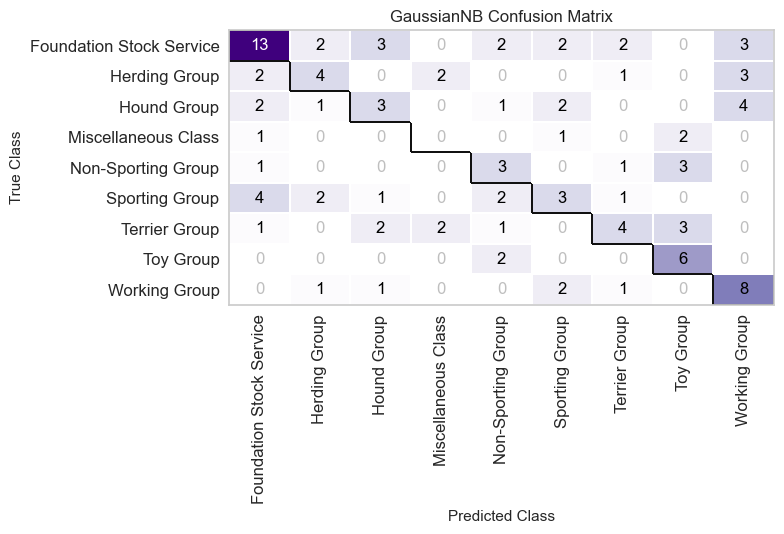

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [6400]:
from yellowbrick.classifier import ConfusionMatrix

# Criar o visualizador da matriz de confusão
cm = ConfusionMatrix(gnb, cmap='Purples')

# Ajustar os dados de treinamento ao visualizador
cm.fit(features_train, target_train)

# Avaliar o modelo nos dados de teste
cm.score(features_test, target_test)

# Plotar a matriz de confusão
cm.show()

#### -> Naive Bays - PCA

In [6401]:

# Trata todas as classes igualmente.
f1_macro = f1_score(target_test_pca, target_pred_pca, average='macro') * 100
print("F1-score (Macro Average): {:.2f}%".format(f1_macro))

## Dá mais importância às classes com mais exemplos.
f1_weighted = f1_score(target_test_pca, target_pred_pca, average='weighted') * 100
print("F1-score (Weighted Average): {:.2f}%".format(f1_weighted))

F1-score (Macro Average): 31.56%
F1-score (Weighted Average): 37.38%


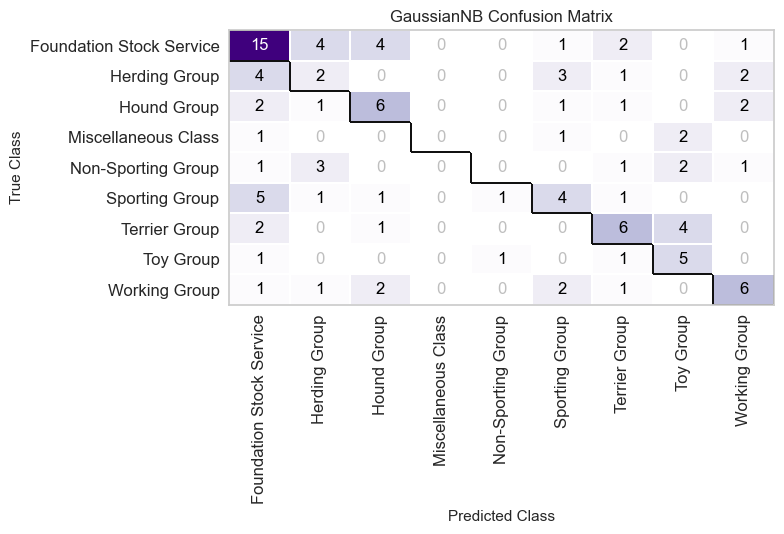

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [6402]:
# Criar o visualizador da matriz de confusão
cm = ConfusionMatrix(gnb_pca, cmap='Purples')

# Ajustar os dados de treinamento ao visualizador
cm.fit(features_train_pca, target_train_pca)

# Avaliar o modelo nos dados de teste
cm.score(features_test_pca, target_test_pca)

# Plotar a matriz de confusão
cm.show()


#### -> Conclusão

- Ao analiazar os resultados do Naive Bays vemos que a acurácia com redução manual se deu levemente maior que a com PCA, assim como o F1-score  38.77%(redução manual)/ 37.38%(PCA). Em comparação com os resultados do Random Forest, Naive Bays teve acurácia pior, e conseguiu acertar menos grupos, como observasdo na matriz de confusasso. Isso pode ocorrer pelo Random Forest ter maior flexibilidade com  outliers e ser menos complexo.

### MPL

In [6403]:
# Import do classificador Perceptron Multicamadas
from sklearn.neural_network import MLPClassifier

In [6404]:
# Defina o número desejado de iterações
max_iter = 10000  # Antes de definir estava sendo alcançado o numero max de itetaçoes antes de ser convergido

# Inicializando e treinando o classificador MLP
mlp = MLPClassifier(random_state=SEED, max_iter=max_iter)
mlp.fit(features_train, target_train) 

mlp_pca = MLPClassifier(random_state=SEED, max_iter=max_iter)
mlp_pca.fit(features_train_pca, target_train_pca)

# Faça previsões no conjunto de teste
target_pred = mlp.predict(features_test)
target_pred_pca = mlp_pca.predict(features_test_pca)


In [6405]:
# Calcule a acurácia do modelo
accuracy = accuracy_score(target_test, target_pred)
accuracy_pca = accuracy_score(target_test_pca, target_pred_pca)

print("Acurácia do modelo sem PCA:", accuracy)
print("Acurácia do modelo com PCA:", accuracy_pca)

Acurácia do modelo sem PCA: 0.43243243243243246
Acurácia do modelo com PCA: 0.42342342342342343


#### -> MPL - redução manual

In [6406]:
# Trata todas as classes igualmente.
f1_macro = f1_score(target_test, target_pred, average='macro') * 100
print("F1-score (Macro Average): {:.2f}%".format(f1_macro))

## Dá mais importância às classes com mais exemplos.
f1_weighted = f1_score(target_test, target_pred, average='weighted') * 100
print("F1-score (Weighted Average): {:.2f}%".format(f1_weighted))


F1-score (Macro Average): 40.73%
F1-score (Weighted Average): 43.26%


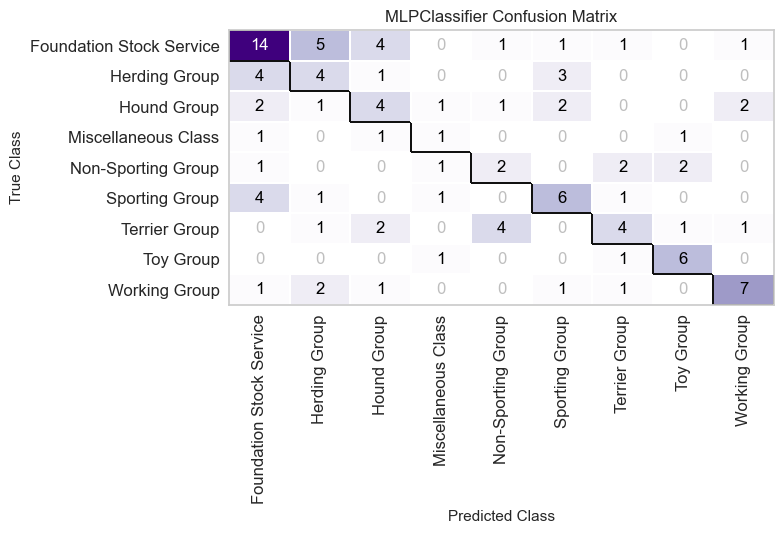

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [6407]:
# Criar o visualizador da matriz de confusão
cm = ConfusionMatrix(mlp, cmap='Purples')

# Ajustar os dados de treinamento ao visualizador
cm.fit(features_train, target_train)

# Avaliar o modelo nos dados de teste
cm.score(features_test, target_test)
cm.show()

#### -> MPL - PCA

In [6408]:
# Trata todas as classes igualmente.
f1_macro = f1_score(target_test, target_pred_pca, average='macro') * 100
print("F1-score (Macro Average): {:.2f}%".format(f1_macro))

## Dá mais importância às classes com mais exemplos.
f1_weighted = f1_score(target_test, target_pred_pca, average='weighted') * 100
print("F1-score (Weighted Average): {:.2f}%".format(f1_weighted))


F1-score (Macro Average): 38.14%
F1-score (Weighted Average): 42.00%


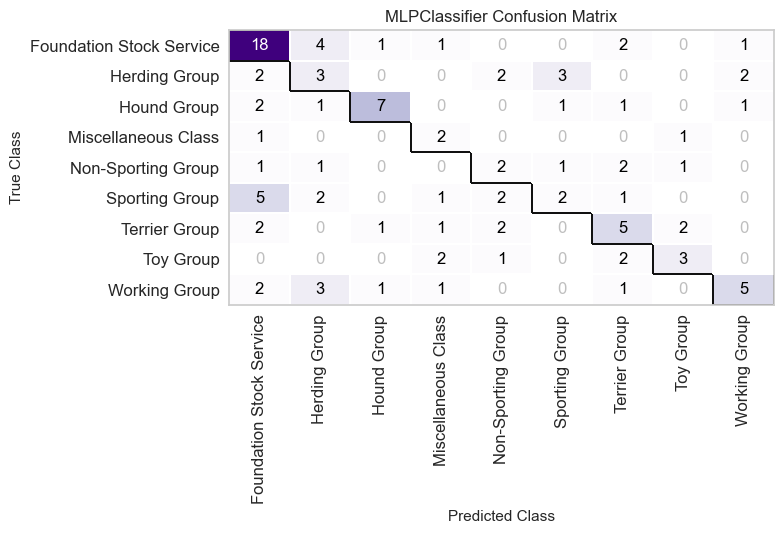

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [6409]:
# Criar o visualizador da matriz de confusão
cm = ConfusionMatrix(mlp_pca, cmap='Purples')

# Ajustar os dados de treinamento ao visualizador
cm.fit(features_train_pca, target_train_pca)

# Avaliar o modelo nos dados de teste
cm.score(features_test_pca, target_test_pca)
cm.show()

#### -> Conclusão

- Ao comparar novamente a acurácia e o F1-score médio do MPL com redução manunal e com PCA observamos que dessa vez os valores deram muito parecido, com veriaçoes de apenas 1 ou 2%. 

### Conclusões gerais

Comparando todos os resultados o método que mais teve acurácia e conseguiu prever os grupos certos foi o Random Forest e em segundo lugar o MLP e ainda sim obtiveram acuracias menores que 50%. Isso pode ser explicado por ser um banco de dados muito pequeno e pelo desbalanceamento do conjunto de dados mesmo após o pré-processamento, além de ter sido usado um conjunto teste/treinamento que foi dividido 40%/60%, e esse método geralmente se dá melhor com um conjunto de dados maior.

 O grupo Foundation Stok Servece foi o melhor acertado, provavelmente por ser o de maior quantidade no banco de dados e o grupo menos acertado foi o Miscellaneous Class, o que seria previsível por ser uma classe "guarda-chiva" para objetos que não se encaixam perefeitamente em outras classes. 

In [6410]:
# Justificativa para 'Foundation Stock Service' ter mais acertos
base_akc_aggregated.group.value_counts()

group
Foundation Stock Service    68
Hound Group                 32
Sporting Group              32
Terrier Group               31
Working Group               31
Herding Group               30
Toy Group                   21
Non-Sporting Group          21
Miscellaneous Class         11
Name: count, dtype: int64

# 2 - Questão 02 - Aprendizagem não-supervisionada

## -> K-means

Verifiquei o numero de colunas após retirar o label e usarei a quantidade de colunas como o numero inicial de clusters

In [6411]:
# Retirando o label
base_akc_aggregated = base_akc_aggregated.drop(columns=['group'])

num_columns = base_akc_aggregated.shape[1]
print("Número de colunas:", num_columns)
column_names = base_akc_aggregated.columns
print("Nomes das colunas:", column_names)

Número de colunas: 9
Nomes das colunas: Index(['min_expectancy', 'max_expectancy', 'grooming_frequency_value',
       'shedding_value', 'energy_level_value', 'trainability_value',
       'demeanor_value', 'average_height', 'average_weight'],
      dtype='object')


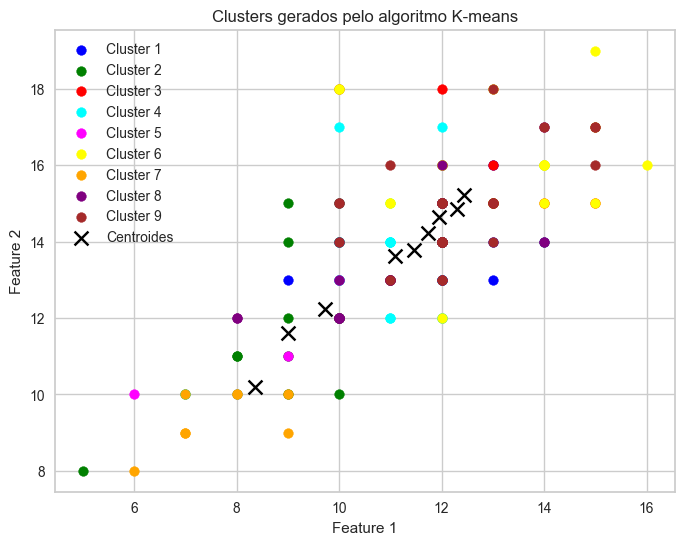

In [6412]:
from sklearn.cluster import KMeans

# Defina o número de clusters desejado
num_clusters = 9

# Inicializa o modelo K-means com o número de clusters especificado
kmeans = KMeans(n_clusters=num_clusters)

# Ajusta o modelo aos dados
kmeans.fit(features)

# label dos clusters 
cluster_labels = kmeans.labels_

# Obtenha as coordenadas dos centroides de cada cluster
cluster_centers = kmeans.cluster_centers_


# Lista de cores únicas para cada cluster
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'brown', 'pink']

# Plotar os clusters
plt.figure(figsize=(8, 6))

# Iterar sobre cada cluster único encontrado
for i in range(num_clusters):
    # Selecionar os pontos pertencentes ao cluster atual
    cluster_points = features[cluster_labels == i]
    
    # Plotar os pontos do cluster atual com uma cor única
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}', color=colors[i])

# Plotar os centroides de cada cluster
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black', s=100, label='Centroides')

# Adicionar rótulos e legendas ao gráfico
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters gerados pelo algoritmo K-means')
plt.legend()

# Exibir o gráfico
plt.show()


Com a escolha de k = 9 temos um resultado que não é satsfatório, os grupos não encontram-se bem definidos e muitos deles são marcados apenas 1 vez. Isso significa que a quantidade de k não é ideial. Para saber a quantidade ideal é necessario fazer o teste do Cotovelo.

## -> Teste do Cotovelo


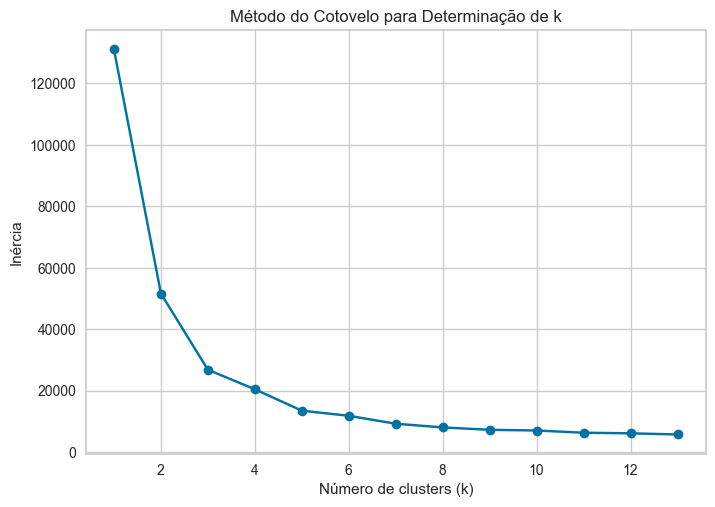

In [6413]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para armazenar os valores da inércia
inertia_values = []

# Testar diferentes valores de k
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.plot(range(1, 14), inertia_values, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinação de k')
plt.show()


Como foi mostrado no gráfico acima o número ideal de clusters é 4, depis dele a redução não é mais tão significava.

- Gráfico K-MEAN com a quantidade ideial de Clusters:

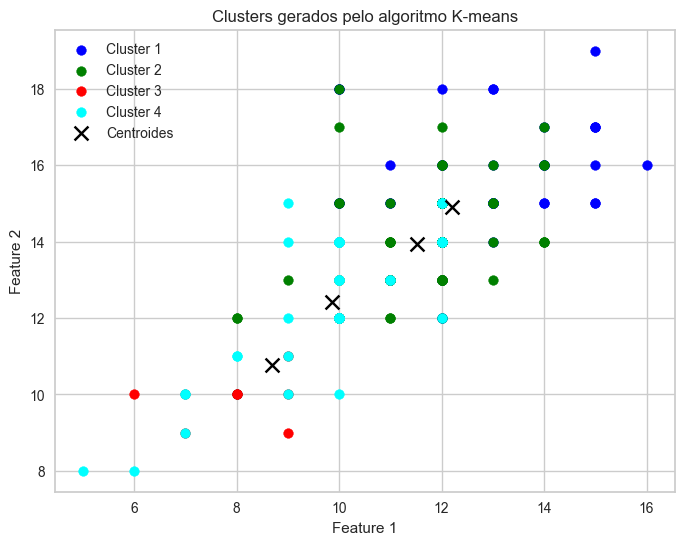

In [6414]:
# Defina o número de clusters desejado
num_clusters = 4

# Inicializa o modelo K-means com o número de clusters especificado
kmeans = KMeans(n_clusters=num_clusters)

# Ajusta o modelo aos dados
kmeans.fit(features)

# label dos clusters 
cluster_labels = kmeans.labels_

# Obtenha as coordenadas dos centroides de cada cluster
cluster_centers = kmeans.cluster_centers_


# Lista de cores únicas para cada cluster
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'brown', 'pink']

# Plotar os clusters
plt.figure(figsize=(8, 6))

# Iterar sobre cada cluster único encontrado
for i in range(num_clusters):
    # Selecionar os pontos pertencentes ao cluster atual
    cluster_points = features[cluster_labels == i]
    
    # Plotar os pontos do cluster atual com uma cor única
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}', color=colors[i])

# Plotar os centroides de cada cluster
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black', s=100, label='Centroides')

# Adicionar rótulos e legendas ao gráfico
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters gerados pelo algoritmo K-means')
plt.legend()

# Exibir o gráfico
plt.show()


## -> Hierárquico

Foi executado o hierárquico por linage Ward e Completa. Como já havia sido definido pelo teste de cotovelo o K ideal = 4 usaremos esse mesmo valor para o hierárquico.

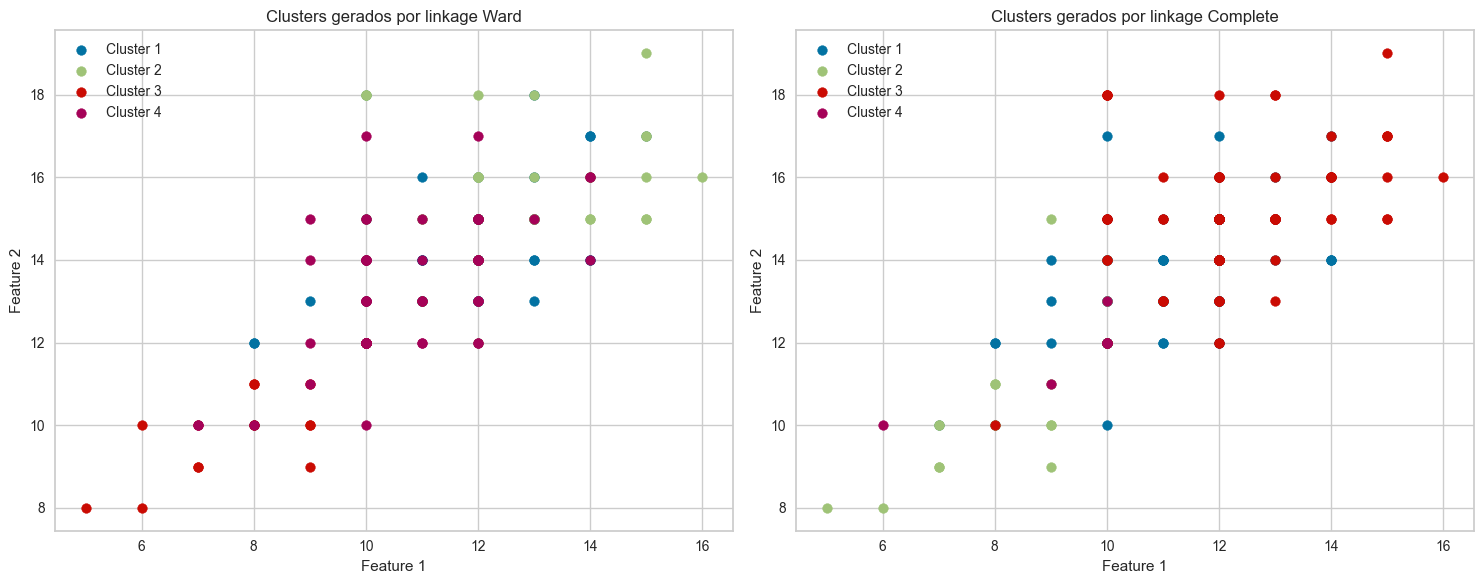

In [6415]:
from sklearn.cluster import AgglomerativeClustering

# Defina o número de clusters desejado
num_clusters = 4

# Lista dos métodos de linkage a serem testados
linkage_methods = ['ward', 'complete']

# Plotar os clusters para cada método de linkage
plt.figure(figsize=(15, 6))

# Iterar sobre cada método de linkage
for i, linkage_method in enumerate(linkage_methods):
    
    # Inicializar o modelo de clustering hierárquico com o método de linkage atual
    hierarchical_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage_method)
    
    # Ajustar o modelo aos dados
    hierarchical_clustering.fit(features)
    
    # Obter as etiquetas dos clusters para cada amostra
    cluster_labels_hierarchical = hierarchical_clustering.labels_
    
    # Subplot para cada método de linkage
    plt.subplot(1, 2, i+1)
    
    # Iterar sobre cada cluster único encontrado
    for j in range(num_clusters):
        # Selecionar os pontos pertencentes ao cluster atual
        cluster_points = features[cluster_labels_hierarchical == j]
        
        # Plotar os pontos do cluster atual
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {j+1}')
    
    # Adicionar rótulos e legendas ao gráfico
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Clusters gerados por linkage {linkage_method.capitalize()}')
    plt.legend()

# Exibir os subplots
plt.tight_layout()
plt.show()


## -> Comparação Hierárquico/K-means e Conclusão

In [6422]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

# Definir o número de clusters desejado
k = 4

# Inicializar os algoritmos de clusterização
kmeans = KMeans(n_clusters=k)
hierarchical_ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
hierarchical_complete = AgglomerativeClustering(n_clusters=k, linkage='complete')

# Calcular o índice de Davies-Bouldin para K-means
kmeans_dbi = davies_bouldin_score(features, kmeans.fit_predict(features))

# Calcular o índice de Davies-Bouldin para o Hierárquico com linkage ward
hierarchical_ward_dbi = davies_bouldin_score(features, hierarchical_ward.fit_predict(features))

# Calcular o índice de Davies-Bouldin para o Hierárquico com linkage complete
hierarchical_complete_dbi = davies_bouldin_score(features, hierarchical_complete.fit_predict(features))

# Exibir resultados
print("Índice de Davies-Bouldin para K-means:", kmeans_dbi)
print("Índice de Davies-Bouldin para Hierárquico (Ward):", hierarchical_ward_dbi)
print("Índice de Davies-Bouldin para Hierárquico (Complete):", hierarchical_complete_dbi)



Índice de Davies-Bouldin para K-means: 0.671681960568309
Índice de Davies-Bouldin para Hierárquico (Ward): 0.7160675341580994
Índice de Davies-Bouldin para Hierárquico (Complete): 0.5980335775983181


Com base nos índices de Davies-Bouldin, pode-se concluir que o método de clustering aglomerativo hierárquico com linkage 'complete' teve um desempenho melhor em termos de qualidade dos agrupamentos em relação aos outros métodos testados. Isso pode ter ocorrido pelo método complete ser muito bom em lidar com a presença de outliers e com conjunto dados com clusters com formas variadas e irregulares.